In [1]:
import seaborn as sns
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from datetime import timedelta

In [ ]:
# Chemin complet du fichier
db_path = 'C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db'

# Connexion à la base de données SQLite avec le chemin complet
conn = sqlite3.connect(db_path)

In [2]:
try:
    # Chemin complet du fichier dans Google Drive
    db_path = 'C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db'

    # Connexion à la base de données SQLite avec le chemin complet
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Tentez d'exécuter une requête simple
    cursor.execute("SELECT * FROM sellers LIMIT 5")
    rows = cursor.fetchall()

    # Afficher les résultats
    for row in rows:
        print(row)

    # Fermer la connexion
    conn.close()
except sqlite3.DatabaseError as e:
    print("Erreur de base de données:", e)
except Exception as e:
    print("Erreur:", e)


(0, '3442f8959a84dea7ee197c632cb2df15', 13023, 'campinas', 'SP')
(1, 'd1b65fc7debc3361ea86b5f14c68d2e2', 13844, 'mogi guacu', 'SP')
(2, 'ce3ad9de960102d0677a81f5d0bb7b2d', 20031, 'rio de janeiro', 'RJ')
(3, 'c0f3eea2e14555b6faeea3dd58c1b1c3', 4195, 'sao paulo', 'SP')
(4, '51a04a8a6bdcb23deccc82b0b80742cf', 12914, 'braganca paulista', 'SP')


In [3]:
# Assurez-vous que le chemin vers votre fichier .db est correct
db_path = 'C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db'

# Copiez votre requête SQL ici comme une chaîne de caractères
requete_sql = """
SELECT order_id, customer_id, order_purchase_timestamp, order_estimated_delivery_date, order_delivered_customer_date
FROM orders
WHERE order_status != 'canceled'
AND order_purchase_timestamp >= date('2018-11-12 00:00:00', '-3 month')
AND julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date) >= 3
"""

# Connexion à la base de données SQLite avec le chemin complet
conn = sqlite3.connect(db_path)

# Exécuter la requête SQL et récupérer les résultats dans un DataFrame Pandas
data = pd.read_sql_query(requete_sql, conn)

# Afficher le résultat
data

,order_id,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
0,cfa4fa27b417971e86d8127cb688712f,7093250e1741ebbed41f0cc552025fd6,2018-08-16 09:44:23,2018-08-22 00:00:00,2018-08-29 01:41:41
1,234c056c50619f48da64f731c48242b4,44e460a655f7154ccd9faa4dbbbaf68a,2018-08-14 14:49:15,2018-08-23 00:00:00,2018-09-01 18:14:42
2,34871174fe1f4c68f7efac5e5b3fbbde,0d72c06cbd17cde4598ce4aa6d065a7c,2018-08-19 22:45:16,2018-08-27 00:00:00,2018-08-30 16:03:02
3,adb8036d8a5a923d533101a9a7397523,25f08a1d68e45786faabcd178d5e074b,2018-08-15 22:30:47,2018-08-21 00:00:00,2018-08-28 18:32:11
4,dd787ad9c97e5504d6ea0bd294906902,c4f27e4018dec8c1bb82c0e2ce63d47e,2018-08-14 17:02:40,2018-08-29 00:00:00,2018-09-05 22:22:01
5,be604de4ce5e2e8658c03895db0621a9,7df479fc612c759bcdda62339fbf65dd,2018-08-20 10:18:24,2018-08-23 00:00:00,2018-08-31 14:41:58
6,a5e7b733ac9f9e3d9bafeacd10b5aff9,4ae745c1702dfdb655e2c1147289887a,2018-08-21 21:44:04,2018-08-24 00:00:00,2018-08-27 16:54:45
7,df0a2eff6f0fc7262189d138f3defa0b,3325076d2bbc0b97e626ed18613f0e3b,2018-08-18 00:14:09,2018-08-24 00:00:00,2018-08-28 21:51:46
8,7aa4279cc25c67bbcf033b0ffa8e5587,e856f89269e191682aec4066d32ffa45,2018-08-15 06:58:44,2018-08-24 00:00:00,2018-08-27 21:18:38
9,34688497162fbb53b24e10738f912fa4,35b1a3161577151979b495f826641469,2018-08-14 21:28:20,2018-08-22 00:00:00,2018-09-04 21:33:01


In [4]:
# Chemin de votre base de données SQLite
conn = sqlite3.connect('C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db')
cursor = conn.cursor()

query = """
CREATE TABLE IF NOT EXISTS SuiviClient AS
SELECT
    c.customer_id,
    c.customer_zip_code_prefix,
    c.customer_city,
    c.customer_state,
    COUNT(DISTINCT o.order_id) AS nbr_commande,
    MIN(o.order_purchase_timestamp) AS Date_Premier_Commande,
    MAX(o.order_purchase_timestamp) AS Date_Derniere_Commande,
    SUM(p.payment_value) AS Total_achat
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id AND o.order_status != 'canceled'
JOIN order_pymts p ON o.order_id = p.order_id
GROUP BY c.customer_id;
"""

# Exécution de la requête
cursor.execute(query)


In [5]:
# Sauvegarde (commit) les changements
conn.commit()

# Ferme la connexion
conn.close()


In [6]:
# Chemin de votre base de données SQLite
conn = sqlite3.connect('C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db')

# Utilisation de pandas pour lire la table SuiviClient
data = pd.read_sql_query("SELECT * FROM SuiviClient", conn)

# Affichage du DataFrame
data
# Ferme la connexion
conn.close()

In [7]:
data.groupby('nbr_commande').count()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,Date_Premier_Commande,Date_Derniere_Commande,Total_achat
nbr_commande,,,,,,,
1,98815,98815,98815,98815,98815,98815,98815


In [8]:
# Chemin de votre base de données SQLite
conn = sqlite3.connect('C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db')
cursor = conn.cursor()

query2 = """
CREATE TABLE IF NOT EXISTS SuiviClient2 AS
SELECT
    cust.customer_unique_id,
    cust.customer_zip_code_prefix,
    cust.customer_city,
    cust.customer_state,
    COUNT(DISTINCT ord.order_id) AS nbr_commande,
    MIN(ord.order_purchase_timestamp) AS Date_Premier_Commande,
    MAX(ord.order_purchase_timestamp) AS Date_Derniere_Commande,
    SUM(pay.payment_value) AS Total_achat
FROM
    (SELECT customer_unique_id, customer_id, customer_zip_code_prefix, customer_city, customer_state
     FROM customers) AS cust
LEFT JOIN orders AS ord ON cust.customer_id = ord.customer_id AND ord.order_status != 'canceled'
LEFT JOIN order_pymts AS pay ON ord.order_id = pay.order_id
GROUP BY cust.customer_unique_id, cust.customer_zip_code_prefix, cust.customer_city, cust.customer_state;
"""

# Exécution de la requête
cursor.execute(query2)


In [9]:
# Sauvegarde (commit) les changements
conn.commit()

# Ferme la connexion
conn.close()


In [10]:
# Chemin de votre base de données SQLite
conn = sqlite3.connect('C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/olist.db')

# Utilisation de pandas pour lire la table SuiviClient
data2 = pd.read_sql_query("SELECT * FROM SuiviClient2", conn)

# Affichage du DataFrame
data2

# Sauvegarde (commit) les changements
conn.commit()

# Ferme la connexion
conn.close()

In [11]:
data2

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,2018-05-10 10:56:27,2018-05-10 10:56:27,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,2018-05-07 11:11:27,2018-05-07 11:11:27,27.19
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,1,2017-03-10 21:05:03,2017-03-10 21:05:03,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,1,2017-10-12 20:29:41,2017-10-12 20:29:41,43.62
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,1,2017-11-14 19:45:42,2017-11-14 19:45:42,196.89
...,...,...,...,...,...,...,...,...
96347,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,1,2017-06-08 21:00:36,2017-06-08 21:00:36,2067.42
96348,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,1,2017-12-10 20:07:56,2017-12-10 20:07:56,84.58
96349,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,1,2017-02-07 15:49:16,2017-02-07 15:49:16,112.46
96350,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,1,2018-05-02 15:17:41,2018-05-02 15:17:41,133.69


In [12]:
data2_filtered = data2[data2['nbr_commande'] >= 5]
data2_filtered

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat
7190,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR,6,2017-01-05 14:18:03,2017-01-05 15:25:10,110.72
10378,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7,2017-11-13 16:44:41,2018-02-14 13:22:12,959.01
20386,35ecdf6858edc6427223b64804cf028e,65075,sao luis,MA,5,2017-08-05 14:55:19,2018-03-31 21:18:49,603.90
21630,394ac4de8f3acb14253c177f0e15bc58,1239,sao paulo,SP,5,2017-12-22 19:23:43,2018-08-15 18:01:23,745.41
23527,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,5,2017-09-18 18:53:15,2018-02-27 18:36:39,495.03
27106,47c1a3033b8b77b3ab6e109eb4d5fdf3,6634,jandira,SP,5,2017-08-07 14:14:22,2018-01-24 15:15:26,801.64
29583,4e65032f1f574189fb793bac5a867bbc,9531,sao caetano do sul,SP,5,2017-03-26 18:39:34,2018-06-14 09:28:49,490.41
32749,56c8638e7c058b98aae6d74d2dd6ea23,37800,guaxupe,MG,5,2017-07-12 06:48:11,2018-04-19 18:54:32,806.47
35719,5e8f38a9a1c023f3db718edcf926a2db,44053,feira de santana,BA,5,2017-08-21 10:20:23,2018-03-06 14:40:32,1114.18
37680,63cfc61cee11cbe306bff5857d00bfe4,23535,rio de janeiro,RJ,6,2017-05-11 14:39:53,2018-05-28 17:20:02,826.32


C:\Users\DELL\AppData\Local\Temp\ipykernel_15816\2797283916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data2_filtered, x='nbr_commande', y='customer_state', inner='stick', palette='Dark2')


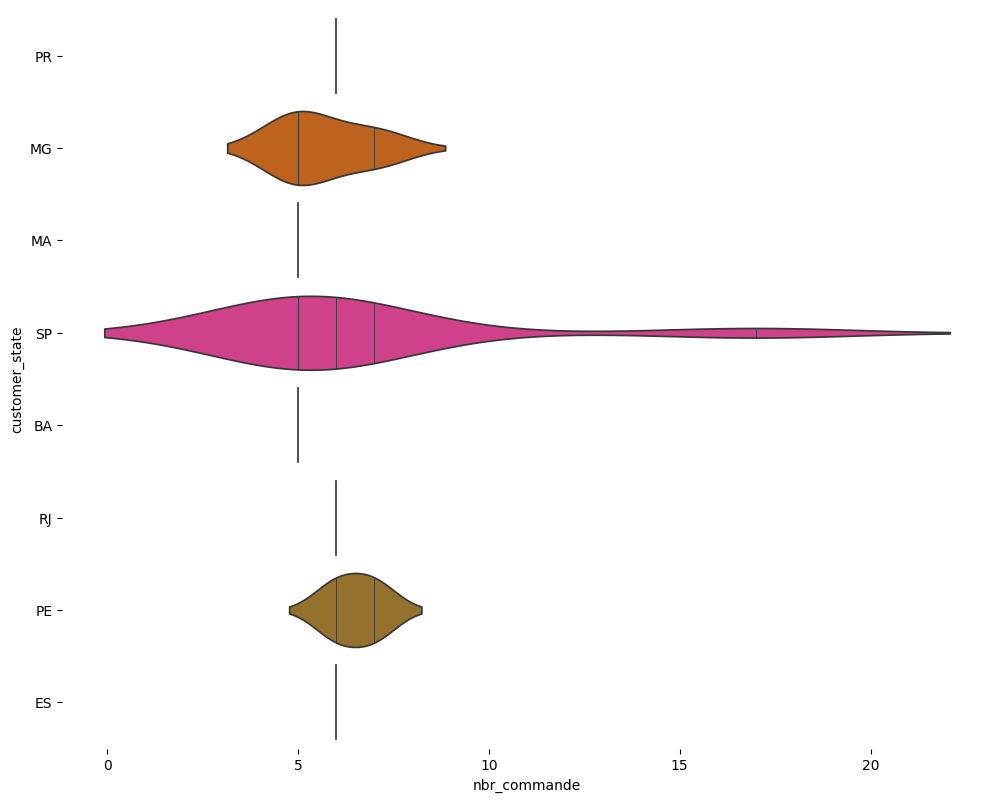

In [13]:
figsize = (12, 1.2 * len(data2_filtered['customer_state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data2_filtered, x='nbr_commande', y='customer_state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
data2 = data2[data2['nbr_commande'] != 0]
data2

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,2018-05-10 10:56:27,2018-05-10 10:56:27,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,2018-05-07 11:11:27,2018-05-07 11:11:27,27.19
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,1,2017-03-10 21:05:03,2017-03-10 21:05:03,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,1,2017-10-12 20:29:41,2017-10-12 20:29:41,43.62
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,1,2017-11-14 19:45:42,2017-11-14 19:45:42,196.89
...,...,...,...,...,...,...,...,...
96347,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,1,2017-06-08 21:00:36,2017-06-08 21:00:36,2067.42
96348,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,1,2017-12-10 20:07:56,2017-12-10 20:07:56,84.58
96349,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,1,2017-02-07 15:49:16,2017-02-07 15:49:16,112.46
96350,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,1,2018-05-02 15:17:41,2018-05-02 15:17:41,133.69


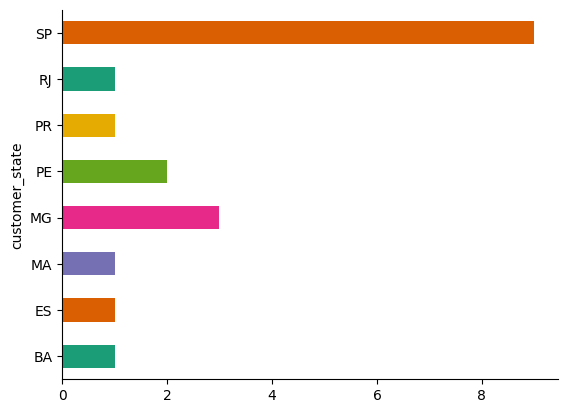

In [15]:
data2_filtered.groupby('customer_state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# Récence: Calcul de la différence entre la date la plus récente dans votre dataset
data2['Date_Derniere_Commande'] = pd.to_datetime(data2['Date_Derniere_Commande'])
data2['Récence'] = (data2['Date_Derniere_Commande'].max() - data2['Date_Derniere_Commande']).dt.days

# Fréquence: Utiliser directement la colonne 'nbr_commande'
data2['Fréquence'] = data2['nbr_commande']

# Montant: Utiliser directement la colonne 'Total_achat'
data2['Montant'] = data2['Total_achat']

C:\Users\DELL\AppData\Local\Temp\ipykernel_15816\3545841888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date_Derniere_Commande'] = pd.to_datetime(data2['Date_Derniere_Commande'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15816\3545841888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Récence'] = (data2['Date_Derniere_Commande'].max() - data2['Date_Derniere_Commande']).dt.days
C:\Users\DELL\AppData\Local\Temp\ipykernel_15816\3545841888.py:12: SettingWithCopyWarning: 
A value is tr

In [17]:
sorted_data = data2.sort_values(by='Montant', ascending=False)
sorted_data

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat,Récence,Fréquence,Montant
3835,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,1,2017-09-29 15:24:52,2017-09-29 15:24:52,13664.08,338,1,13664.08
82179,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,2,2017-04-01 15:58:40,2017-04-01 15:58:41,7571.63,519,2,7571.63
44559,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,1,2018-07-15 14:49:44,2018-07-15 14:49:44,7274.88,49,1,7274.88
83026,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1,2017-02-12 20:37:36,2017-02-12 20:37:36,6929.31,567,1,6929.31
26266,459bef486812aa25204be022145caa62,29066,vitoria,ES,1,2018-07-25 18:10:17,2018-07-25 18:10:17,6922.21,39,1,6922.21
...,...,...,...,...,...,...,...,...,...,...,...
41997,6f5b9d1cdccc4d28f0483a612edecacf,2306,sao paulo,SP,1,2017-09-02 16:05:34,2017-09-02 16:05:34,11.63,365,1,11.63
67562,b33336f46234b24a613ad9064d13106d,4046,sao paulo,SP,1,2018-06-21 20:29:25,2018-06-21 20:29:25,10.89,73,1,10.89
71236,bd06ce0e06ad77a7f681f1a4960a3cc6,4814,sao paulo,SP,1,2017-09-13 19:13:20,2017-09-13 19:13:20,10.07,354,1,10.07
18687,317cfc692e3f86c45c95697c61c853a6,13140,paulinia,SP,1,2018-08-25 21:20:50,2018-08-25 21:20:50,9.59,8,1,9.59


In [18]:
# Supprimer les lignes où la colonne 'Montant' est égale à 13664.08
data2 = data2[data2['Montant'] != 13664.08]
data2 = data2.dropna(subset=['Montant'])

In [19]:
#data2[data2['MontantBase'] <= 0]
# Ajouter une petite constante pour éviter le logarithme de zéro si nécessaire
#data2['Montant'] = np.log(data2['MontantBase'] + 1)


In [20]:
#data2[data2['FréquenceBase'] <= 0]
# Ajouter une petite constante pour éviter le logarithme de zéro si nécessaire
#data2['Fréquence'] = np.log(data2['FréquenceBase'] + 1)

# Observation

In [23]:
data2[data2['nbr_commande'] >= 5]

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat,Récence,Fréquence,Montant
7190,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR,6,2017-01-05 14:18:03,2017-01-05 15:25:10,110.72,605,6,110.72
10378,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7,2017-11-13 16:44:41,2018-02-14 13:22:12,959.01,200,7,959.01
20386,35ecdf6858edc6427223b64804cf028e,65075,sao luis,MA,5,2017-08-05 14:55:19,2018-03-31 21:18:49,603.90,155,5,603.90
21630,394ac4de8f3acb14253c177f0e15bc58,1239,sao paulo,SP,5,2017-12-22 19:23:43,2018-08-15 18:01:23,745.41,18,5,745.41
23527,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,5,2017-09-18 18:53:15,2018-02-27 18:36:39,495.03,187,5,495.03
27106,47c1a3033b8b77b3ab6e109eb4d5fdf3,6634,jandira,SP,5,2017-08-07 14:14:22,2018-01-24 15:15:26,801.64,221,5,801.64
29583,4e65032f1f574189fb793bac5a867bbc,9531,sao caetano do sul,SP,5,2017-03-26 18:39:34,2018-06-14 09:28:49,490.41,80,5,490.41
32749,56c8638e7c058b98aae6d74d2dd6ea23,37800,guaxupe,MG,5,2017-07-12 06:48:11,2018-04-19 18:54:32,806.47,136,5,806.47
35719,5e8f38a9a1c023f3db718edcf926a2db,44053,feira de santana,BA,5,2017-08-21 10:20:23,2018-03-06 14:40:32,1114.18,180,5,1114.18
37680,63cfc61cee11cbe306bff5857d00bfe4,23535,rio de janeiro,RJ,6,2017-05-11 14:39:53,2018-05-28 17:20:02,826.32,97,6,826.32


In [24]:
# Exemple pour identifier les outliers pour la colonne 'Montant'
mean_val = data2['Montant'].mean()
std_dev = data2['Montant'].std()

# Définir un seuil pour identifier les outliers
threshold = 3

# Trouver les outliers
outliers = data2[(data2['Montant'] < mean_val - threshold * std_dev) | (data2['Montant'] > mean_val + threshold * std_dev)]


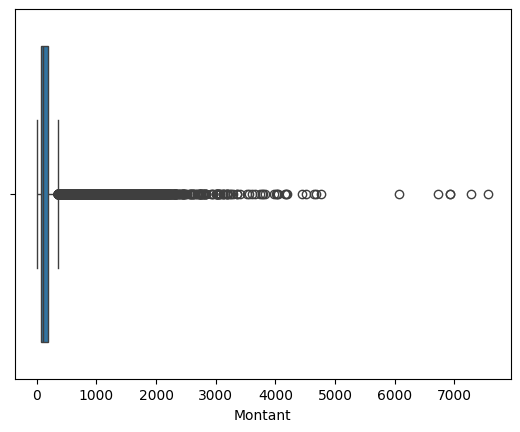

In [25]:
# Créer un boxplot pour visualiser les outliers dans 'Montant'
sns.boxplot(x=data2['Montant'])
plt.show()


In [26]:
# Examiner les outliers pour la colonne 'Montant'
data2_outliers = data2.loc[data2['Montant'].isin(outliers['Montant'])]
data2_outliers

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat,Récence,Fréquence,Montant
128,004df63539fd5e38d4b0a0506de7549c,68743,castanhal,PA,1,2018-07-16 13:30:06,2018-07-16 13:30:06,993.55,48,1,993.55
134,005226be8d5b972d0f72b4e8a79f322b,22280,rio de janeiro,RJ,1,2018-04-01 22:07:00,2018-04-01 22:07:00,1600.51,154,1,1600.51
190,0077dc76aaf02323f03bce9b00878253,57305,arapiraca,AL,1,2018-03-11 17:09:55,2018-03-11 17:09:55,874.42,175,1,874.42
264,00adeda9b742746c0c66e10d00ea1b74,5650,sao paulo,SP,1,2017-11-07 16:54:04,2017-11-07 16:54:04,2148.40,299,1,2148.40
297,00c07da5ba0e07b4f248a3a373b07476,44700,jacobina,BA,1,2018-07-27 14:28:20,2018-07-27 14:28:20,2304.68,37,1,2304.68
...,...,...,...,...,...,...,...,...,...,...,...
96182,ff8eddc3ff272a5724e2ac6635cb7df2,78600,barra do garcas,MT,1,2018-07-01 10:38:02,2018-07-01 10:38:02,991.74,63,1,991.74
96252,ffba9f9dff87b05e310ecc46c8591044,68695,tailandia,PA,1,2017-02-27 15:39:41,2017-02-27 15:39:41,1626.83,552,1,1626.83
96303,ffdffea8a4b04f14987bfef2a2287fa9,13085,campinas,SP,1,2017-09-13 11:04:08,2017-09-13 11:04:08,905.76,354,1,905.76
96339,fff5eb4918b2bf4b2da476788d42051c,58407,campina grande,PB,1,2018-07-02 16:39:59,2018-07-02 16:39:59,2844.96,62,1,2844.96


In [27]:
# Exemple pour identifier les outliers pour la colonne 'Montant'
mean_val = data2['Récence'].mean()
std_dev = data2['Récence'].std()

# Définir un seuil pour identifier les outliers
threshold = 3

# Trouver les outliers
outliers = data2[(data2['Récence'] < mean_val - threshold * std_dev) | (data2['Récence'] > mean_val + threshold * std_dev)]

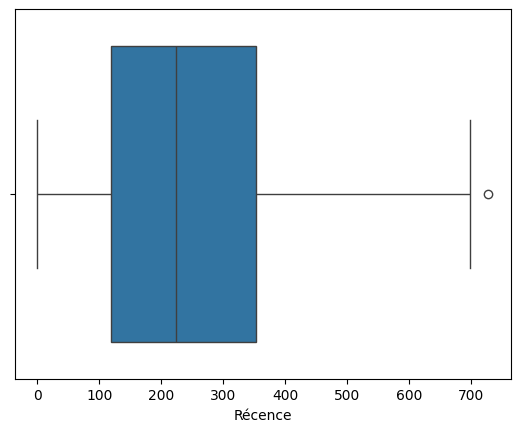

In [28]:
# Créer un boxplot pour visualiser les outliers dans 'Montant'
sns.boxplot(x=data2['Récence'])
plt.show()


In [29]:
# Examiner les outliers pour la colonne 'Montant'
data2_outliers = data2.loc[data2['Récence'].isin(outliers['Récence'])]
data2_outliers

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat,Récence,Fréquence,Montant
69275,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1,2016-09-04 21:15:19,2016-09-04 21:15:19,136.23,728,1,136.23


In [30]:
# Exemple pour identifier les outliers pour la colonne 'Montant'
mean_val = data2['Fréquence'].mean()
std_dev = data2['Fréquence'].std()

# Définir un seuil pour identifier les outliers
threshold = 3

# Trouver les outliers
outliers = data2[(data2['Fréquence'] < mean_val - threshold * std_dev) | (data2['Fréquence'] > mean_val + threshold * std_dev)]


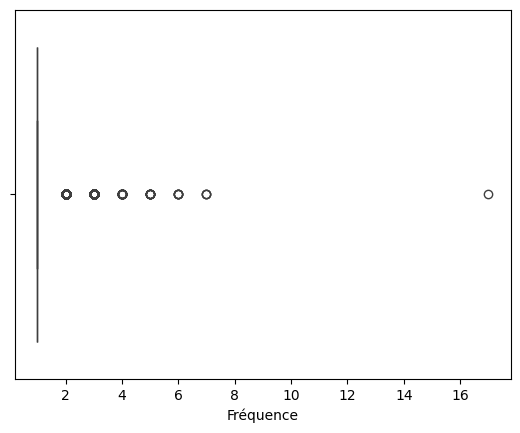

In [31]:
# Créer un boxplot pour visualiser les outliers dans 'Montant'
sns.boxplot(x=data2['Fréquence'])
plt.show()


In [32]:
# Examiner les outliers pour la colonne 'Montant'
data2_outliers = data2.loc[data2['Fréquence'].isin(outliers['Fréquence'])]
data2_outliers

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nbr_commande,Date_Premier_Commande,Date_Derniere_Commande,Total_achat,Récence,Fréquence,Montant
106,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ,2,2017-07-27 14:13:03,2018-01-14 07:36:54,354.37,232,2,354.37
251,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,2,2018-05-23 20:14:21,2018-06-03 10:12:57,123.25,91,2,123.25
314,00cc12a6d8b578b8ebd21ea4e2ae8b27,3178,sao paulo,SP,2,2017-03-21 19:25:22,2017-03-21 19:25:23,126.20,530,2,126.20
416,011575986092c30523ecb71ff10cb473,30660,belo horizonte,MG,2,2018-02-17 15:54:49,2018-04-18 21:58:08,214.90,137,2,214.90
431,011b4adcd54683b480c4d841250a987f,44200,santo amaro,BA,2,2017-08-22 12:51:29,2018-02-15 11:40:57,236.30,199,2,236.30
...,...,...,...,...,...,...,...,...,...,...,...
96013,ff22e30958c13ffe219db7d711e8f564,2989,sao paulo,SP,2,2018-08-24 17:02:19,2018-09-03 09:06:57,332.92,0,2,332.92
96066,ff44401d0d8f5b9c54a47374eb48c1b8,13070,campinas,SP,2,2017-05-19 21:20:54,2017-05-19 21:20:54,68.00,471,2,68.00
96172,ff8892f7c26aa0446da53d01b18df463,45972,ibiraja,BA,2,2017-05-24 16:09:14,2017-11-26 23:25:43,330.14,280,2,330.14
96190,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP,3,2017-02-22 12:26:42,2017-09-14 14:24:04,139.60,353,3,139.60


In [33]:
# Étape 1 : Préparation des données
data2['Date_Premier_Commande'] = pd.to_datetime(data2['Date_Premier_Commande'])
data2_sorted = data2.sort_values(by='Date_Premier_Commande')
data2_sorted['Days'] = (data2_sorted['Date_Premier_Commande'] - data2_sorted['Date_Premier_Commande'].min()).dt.days

# Étape 2 : Ajustement du modèle linéaire
X = data2_sorted[['Days']] # Variables explicatives
y = list(range(1, len(data2_sorted) + 1)) # Conversion de range en liste pour Plotly
model = LinearRegression()
model.fit(X, y)

# Étape 3 : Faire des prédictions sur des dates futures
future_days = np.array([X['Days'].max() + i for i in range(1, 31)]) #pour les 30 jours
future_preds = model.predict(future_days.reshape(-1, 1))

# Calcul de l'intervalle de confiance (±25%)
lower_bound = future_preds * 0.75
upper_bound = future_preds * 1.25

# Étape 4 : Tracer la courbe, incluant l'intervalle de confiance
fig = go.Figure()

# Courbe actuelle
fig.add_trace(go.Scatter(x=data2_sorted['Date_Premier_Commande'], y=y, mode='lines', name='Données Actuelles'))

# Prédictions futures
future_dates = [data2_sorted['Date_Premier_Commande'].max() + timedelta(days=i) for i in range(1, 31)]
fig.add_trace(go.Scatter(x=future_dates, y=future_preds, mode='lines', name='Prédictions Futures'))

# Intervalle de confiance
fig.add_trace(go.Scatter(x=future_dates + future_dates[::-1], y=np.concatenate([upper_bound, lower_bound[::-1]]), fill='toself', fillcolor='rgba(0,100,80,0.2)', line=dict(color='rgba(255,255,255,0)'), name='Intervalle de Confiance ±25%'))

# Mise en forme du graphique
fig.update_layout(title='Évolution et Prévision du Nombre d\'Inscrits', xaxis_title='Date', yaxis_title='Nombre d\'Inscrits', legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()


c:\Users\DELL\anaconda3\envs\2024\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
# Sauvegarde du DataFrame 'data2' au format CSV
chemin_de_sauvegarde_csv = 'C:/Users/DELL/Desktop/OpenClass/Formation/Projet_005/SuiviClient2PourML.csv'
data2.to_csv(chemin_de_sauvegarde_csv, index=False) # Set 'index=False' pour ne pas inclure l'index de DataFrame dans le fichier CSV